In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import batman
from scipy import optimize

In [ ]:
def radius_in_stellar_radii(R_planet, R_star):
    """
    Convert planetary radius in stellar radii
    
    Parameters
    ----------
    R_planet : float
        Planetary radius in R_Jupter

    R_star : float
        Stellar radius in R_sun

    Returns
    -------
    R_planet_stellar_radii : float 
        Planetary radius in stellar radii

    """
    # 1 R_Jupiter = 0.102763 R_sun
    R_planet_stellar_radii = R_planet * 0.102763 / R_star

    return R_planet_stellar_radii

In [ ]:
def semi_major_axis_

In [91]:
true_R_star = 1.23 #R_sun
true_R_planet = 0.78 #R_J
true_semi_major_axis = 0.034 #AU 


params = batman.TransitParams()
params.t0 = 0.                                          #time of inferior conjunction
params.per = 3.3                                        #orbital period (days)
params.rp = true_R_planet * 0.10045 #R_Sun                #planet radius (in units of stellar radii)
params.a = (true_semi_major_axis * 215.032) / true_R_star  #semi-major axis (in units of stellar radii))
params.inc = 89.1                                       #orbital inclination (in degrees)
params.ecc = 0.                                         #eccentricity
params.w = 90.                                          #longitude of periastron (in degrees)
params.limb_dark = "quadratic"                          #limb darkening model
params.u = [0.3423, 0.2939]                             #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.12, 0.12, 1000)                      #times at which to calculate light curve
m = batman.TransitModel(params, t)                      #initializes model
true_flux = m.light_curve(params)

In [92]:
print(params.rp)

0.078351


In [93]:
sigma = 0.001
errs = np.random.normal(loc=0., scale=sigma, size=len(true_flux))
true_flux += errs

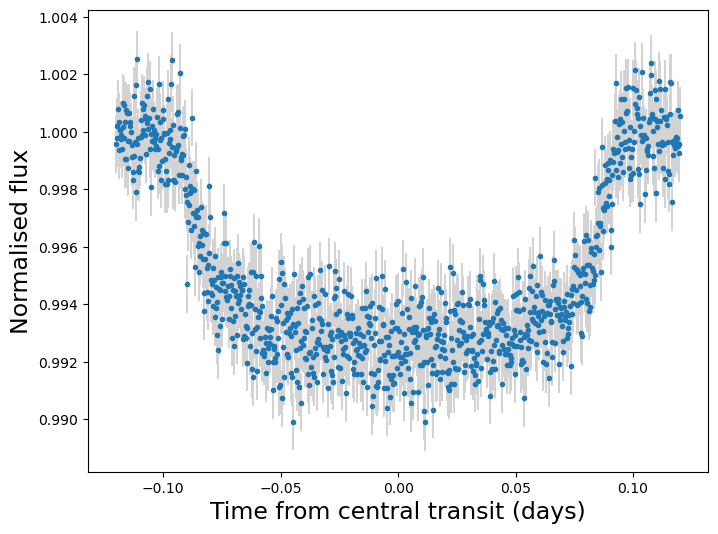

In [94]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.errorbar(t, true_flux, yerr=sigma, fmt='.', ecolor='LightGrey', label="Expected")
plt.xlabel("Time from central transit (days)", size=17)
plt.ylabel("Normalised flux", size=17)
plt.show()

In [95]:
true_R_star = 1.23 #R_sun
true_R_planet = 0.78 #R_J
true_semi_major_axis = 0.034 #AU 


guess_params = batman.TransitParams()
guess_params.t0 = 0.0
guess_params.per = 3.3

guess_params.a = (true_semi_major_axis * 215.032) / true_R_star

guess_params.ecc = 0.0
guess_params.w = 90.0
guess_params.limb_dark = "quadratic"
guess_params.u = [0.3423, 0.2939]



In [96]:
def log_likelihood(params):
    orbital_inclination, R_planet = params

    guess_params.rp = R_planet * 0.10045 #R_Sun
    guess_params.inc = orbital_inclination

    
    t = np.linspace(-0.12, 0.12, 1000)
    m = batman.TransitModel(guess_params, t)
    guess_flux = m.light_curve(guess_params)
        
    L = 0
    for y_i, y_m_i in zip(true_flux, guess_flux):
        L += (-0.5 * ((y_i - y_m_i)**2 / sigma**2))
    L = L + (len(t) / 2) * np.log(2 * np.pi * sigma**2) 

    return L

def log_prior(params):
    model_m, model_c = params

    P = 0.
    if model_m > 30:
        P += -np.inf 

    return P

def log_prob(params):
    return -(log_likelihood(params))# + log_prior(params))

In [97]:
guess = [87, 0.9]

likelihood_model = optimize.minimize(log_prob, guess)#, method='Nelder-Mead'
model_orbital_inclination, model_R_planet = (likelihood_model['x'])
print(likelihood_model)

      fun: 6525.249134781564
 hess_inv: array([[ 2.09227226e-02, -5.20477974e-05],
       [-5.20477974e-05,  4.88751493e-06]])
      jac: array([0.        , 0.00067139])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 158
      nit: 14
     njev: 49
   status: 2
  success: False
        x: array([89.2603764 ,  0.78375817])


In [98]:
true_R_planet = 0.78 #R_J
true_semi_major_axis = 0.034 #AU 


model_params = batman.TransitParams()
model_params.t0 = 0.                                          #time of inferior conjunction
model_params.per = 3.3                                        #orbital period (days)
model_params.rp = model_R_planet * 0.10045 #R_Sun                #planet radius (in units of stellar radii)
model_params.a = (true_semi_major_axis * 215.032) / model_R_star  #semi-major axis (in units of stellar radii))
model_params.inc = model_orbital_inclination                                      #orbital inclination (in degrees)
model_params.ecc = 0.                                         #eccentricity
model_params.w = 90.                                          #longitude of periastron (in degrees)
model_params.limb_dark = "quadratic"                          #limb darkening model
model_params.u = [0.3423, 0.2939]                             #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.12, 0.12, 1000)                      #times at which to calculate light curve
m = batman.TransitModel(params, t)                      #initializes model
model_flux = m.light_curve(params)

In [99]:
residual = true_flux - model_flux

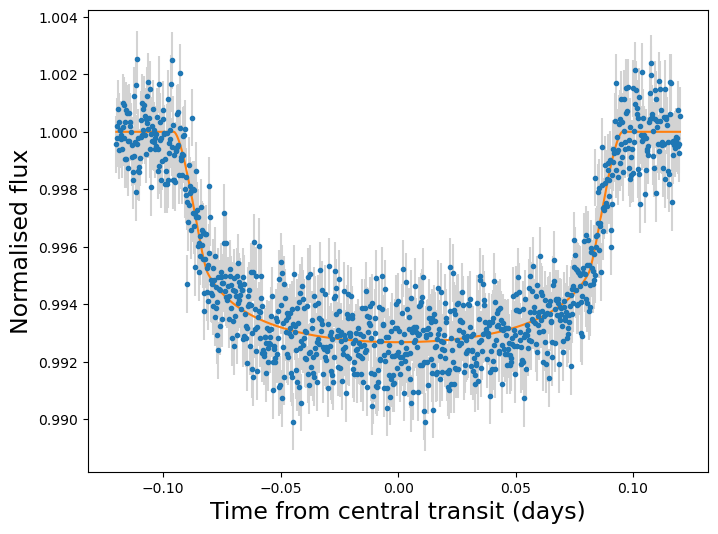

In [100]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.errorbar(t, true_flux, yerr=sigma, fmt='.', ecolor='LightGrey', label="Expected")
plt.plot(t, model_flux)

plt.xlabel("Time from central transit (days)", size=17)
plt.ylabel("Normalised flux", size=17)
plt.show()

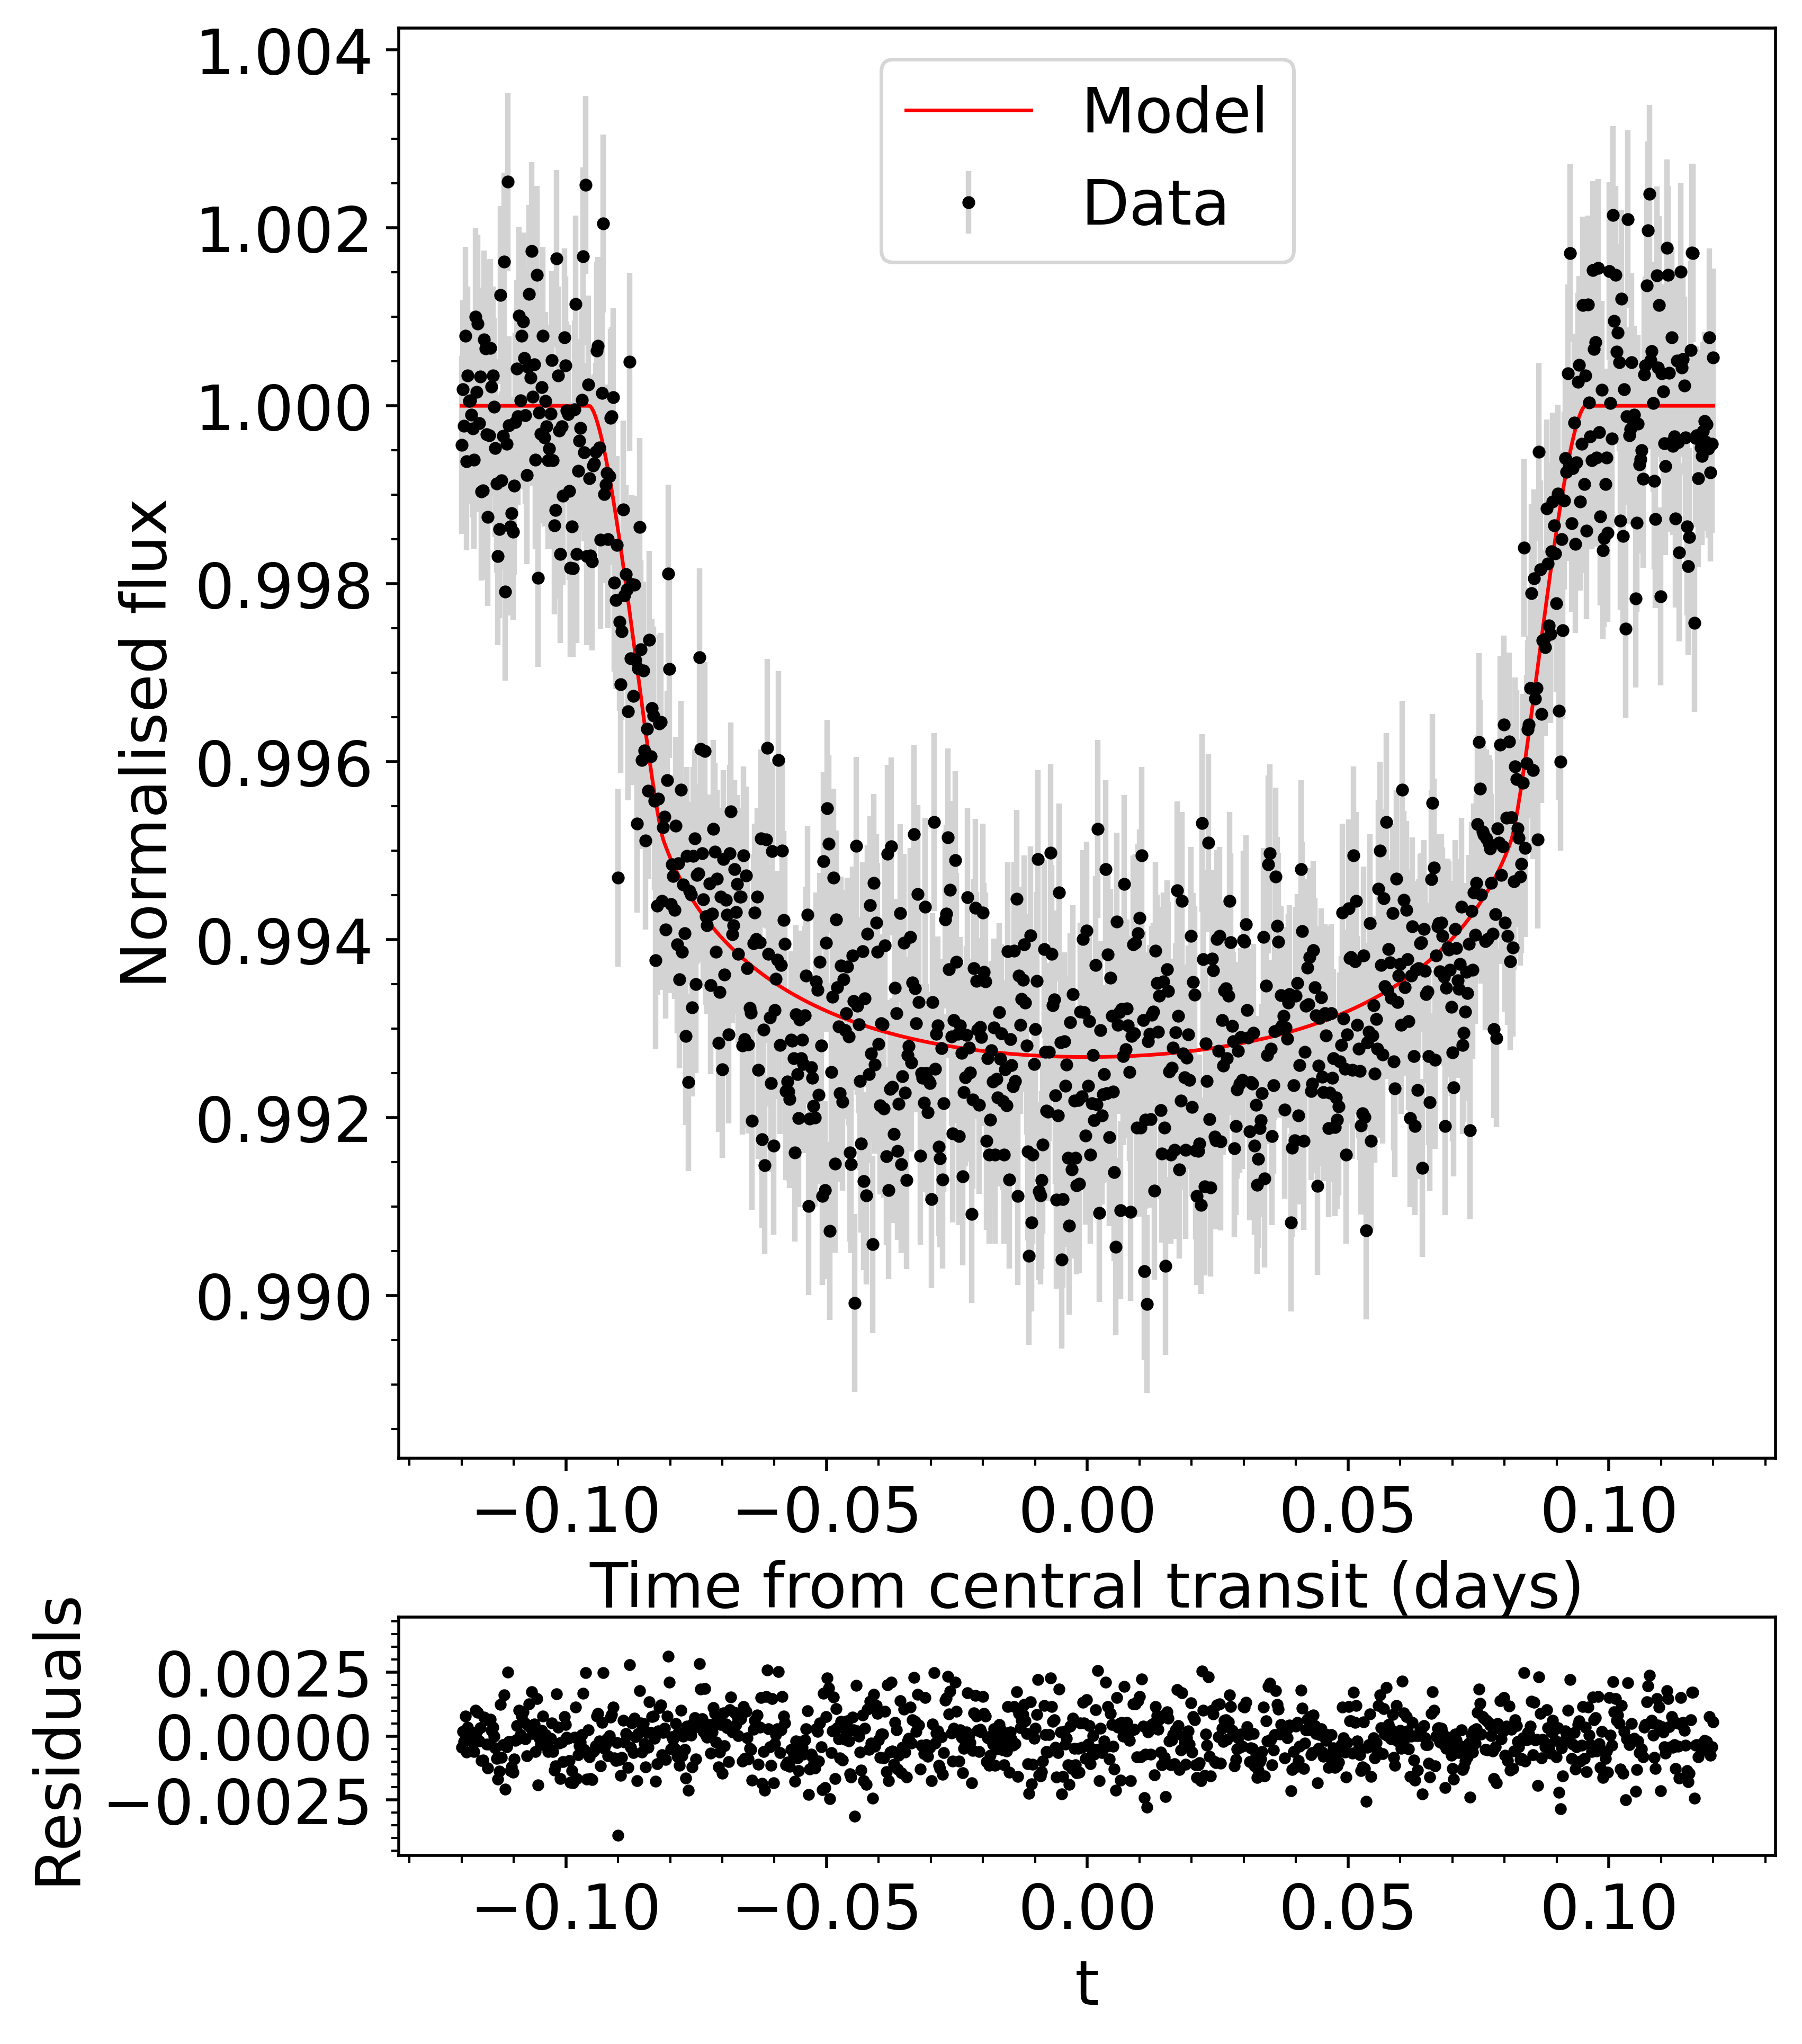

In [101]:
#Panel settings
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -1.15

rect = [left, bottom, width, height]
rect_res = [left, bottom+height+spacing, width, 0.15]

fig = plt.figure(figsize=(8, 6), dpi=500)
ax = fig.add_axes(rect)

ax_res = fig.add_axes(rect_res, sharex=ax)

#Top panel
ax.errorbar(t, true_flux, yerr=sigma, fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data")
ax.plot(t, model_flux, color='red',label="Model", lw=1)

ax.set(xlabel="Time from central transit (days)", ylabel="Normalised flux")
ax.xaxis.label.set_size(17)
ax.yaxis.label.set_size(17)

ax.legend(prop={'size': 17})

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)

#Bottom panel
ax_res.scatter(t, residual, color='black', s=5)
ax_res.set_ylim((-max(abs(residual))*1.2, max(abs(residual)*1.2)))
# ax_res.plot([min(t), max(t)], [0, 0], color='red', lw=1)

ax_res.set(xlabel="t", ylabel="Residuals")
ax_res.xaxis.label.set_size(17)
ax_res.yaxis.label.set_size(17)

ax_res.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax_res.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax_res.xaxis.set_tick_params(labelsize=17)
ax_res.yaxis.set_tick_params(labelsize=17)

# fig.subplots_adjust(hspace=0.1)
plt.show()